In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'retina'  # For sharper figures, but it takes more time
import scipy as sp
from copy import deepcopy 

from lisatools.utils.constants import *
from lisatools.sensitivity  import SensitivityMatrix, A1TDISens,E1TDISens, T1TDISens, AET1SensitivityMatrix

from bbhx.waveforms.phenomhm import PhenomHMAmpPhase
from bbhx.waveformbuild import BBHWaveformFD
from bbhx.utils.interpolate import CubicSplineInterpolant

import noise_generation as noise_generation
from tools.LISASimulator import LISASimulator

No CuPy or GPU PhenomHM module.
No CuPy or GPU interpolation available.
No CuPy
No CuPy or GPU response available.


In [2]:
Tobs = YRSID_SI
dt = 5.
wave_gen = BBHWaveformFD(amp_phase_kwargs=dict(run_phenomd=False))

sim = LISASimulator(Tobs=Tobs, dt=dt, wave_gen=wave_gen, )

In [3]:
wave_gen = BBHWaveformFD(amp_phase_kwargs=dict(run_phenomd=False))

f_ref   = np.array([0.0, 0.0])  # let phenom codes set fRef -> fmax = max(f^2A(f))
phi_ref = np.array([0.0, 1.0])
m1      = np.array([1e6, 8e5])
m2      = np.array([5e5, 2e5])
a1      = np.array([0.2, 0.8])
a2      = np.array([0.4, 0.7])
dist    = np.array([10e3, 10e3])  * PC_SI * 1e6 # 3e3 in Mpc
inc     = np.array([np.pi/3, np.pi/4])
beta    = np.array([np.pi/4., np.pi/5])
lam     = np.array([np.pi/5., np.pi/6])
psi     = np.array([np.pi/6., np.pi/7])
t_ref   = np.array([0.5, 0.8]) * YRSID_SI  # in the SSB reference frame

parameters = np.array([m1, m2, a1, a2, dist, phi_ref, f_ref, inc, lam, beta, psi, t_ref])

modes = [(2,2), (2,1), (3,3), (3,2), (4,4), (4,3)]
waveform_kwargs = dict(direct=False, fill=True, squeeze=False, length=1024)

signal_td = sim(seed = 42, parameters=parameters, modes=modes, waveform_kwargs=waveform_kwargs)

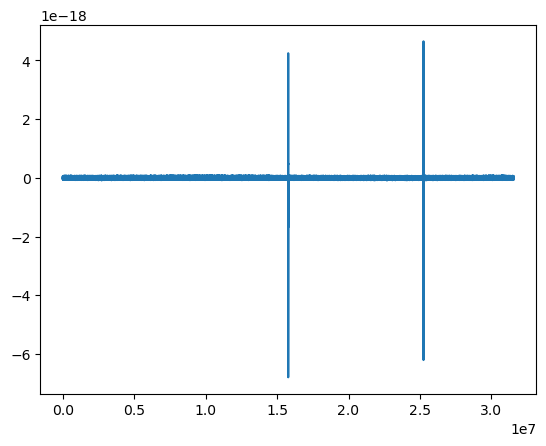

In [4]:
plt.plot(sim.time, signal_td[0])
#plt.xlim(parameters[-1][0] - 60*60*2, parameters[-1][0] - 60*60*1)
#plt.ylim(-1e-19, 1e-19)

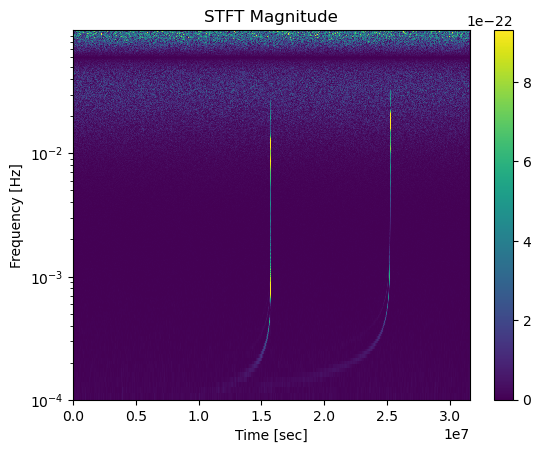

In [6]:
sim.plot_time_frequency()

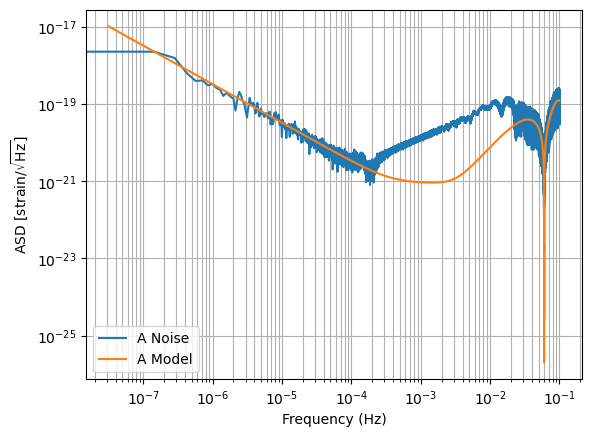

In [7]:
sim.plot_frequency_domain(num_channels=1)